---
<center><h1>Lesson 2 - Basic intro into pandas</h1></center> 
---
---

<center><h2>Part 7. Work with pandas DataFrames: visualization</h2></center>
---

## Table of Contents

- [Work with pandas DataFrames: visualization](#Work-with-pandas-DataFrames:-visualization)
    * [Basic Plotting: plot](#Basic-Plotting:-plot)
    * [Other Plots](#Other-Plots)
    * [Bar plots](#Bar-plots)
    * [Histograms](#Histograms)
    * [Box Plots](#Box-Plots)
    * [Area Plot](#Area-Plot)
    * [Scatter Plot](#Scatter-Plot)
    * [Hexagonal Bin Plot](#Hexagonal-Bin-Plot)    
    * [Pie plot](#Pie-plot)    

In [90]:
import pandas as pd
import numpy as np
import random

## Work with pandas DataFrames: visualization

[[back to top]](#Table-of-Contents)

A primary goal of data visualization is to communicate information clearly and efficiently to users via the statistical graphics, plots, information graphics, tables, and charts selected. Effective visualization helps users in analyzing and reasoning about data and evidence. It makes complex data more accessible, understandable and usable. Users may have particular analytical tasks, such as making comparisons or understanding causality, and the design principle of the graphic (i.e., showing comparisons or showing causality) follows the task. Tables are generally used where users will look-up a specific measure of a variable, while charts of various types are used to show patterns or relationships in the data for one or more variables.

We use the standard convention for referencing the matplotlib API:

In [93]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# By default plot has fixed size 6 x 5
# But we can change width/height values
plt.rcParams["figure.figsize"] = (18.0, 6.0)

In [94]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor
#Import a COVID data layer.  This layer contains the updated stats for each county in the United States
from arcgis.features import FeatureLayer
mylayer = FeatureLayer(("https://services9.arcgis.com/RHVPKKiFTONKtxq3/arcgis/rest/services/NOAA_METAR_current_wind_speed_direction_v1/FeatureServer/0"))
sdf2 = pd.DataFrame.spatial.from_layer(mylayer)
sdfUSA = sdf2.loc[sdf2["COUNTRY"].apply(lambda x: "United States Of America" in str(x))]
sdfUSA["State"] = sdfUSA['COUNTRY'].apply(lambda x: str(x).split(",")[0])
sdfUSA["COUNTRY"] = sdfUSA['COUNTRY'].apply(lambda x: str(x).split(",")[1])
sdfUSA

D66140B0-0277-45FF-AE18-A787BE3D4AAF:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D66140B0-0277-45FF-AE18-A787BE3D4AAF:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,OBJECTID,ICAO,OBS_DATETIME,STATION_NAME,COUNTRY,ELEVATION,TEMP,DEW_POINT,R_HUMIDITY,WIND_DIRECT,WIND_SPEED,WIND_GUST,WIND_CHILL,VISIBILITY,PRESSURE,SKY_CONDTN,WEATHER,REMARKS,HEAT_INDEX,LATITUDE,LONGITUDE,SHAPE,State
1,2,PAYA,2021-02-24 20:23:00,Yakutat,United States Of America,9.0,32.0,30.9,96.0,50.0,28,0,20.8,2800.0,1008.8,"Broken Clouds at 700 meters AGL, Overcast Clou...","Light Snow, Mist","Hourly Precipitation Amount: trace, Pressure F...",NaN,59.52,-139.67,"{""x"": -15547993.2791, ""y"": 8293637.870399997, ...",Alaska
2,3,PATK,2021-02-24 20:23:00,Talkeetna,United States Of America,107.0,24.1,18.0,77.0,360.0,17,0,13.7,6400.0,1004.7,"Broken Clouds at 1100 meters AGL, Overcast Clo...",Light Snow,Hourly Precipitation Amount: 0.0 in,NaN,62.32,-150.10,"{""x"": -16709055.5681, ""y"": 8935421.824299999, ...",Alaska
4,5,KSUE,2021-02-24 20:23:00,Sturgeon Bay,United States Of America,215.0,33.8,30.2,86.0,320.0,19,0,25.2,16000.0,1013.2,"Scattered Clouds at 430 meters AGL, Broken Clo...",Light Rain,Hourly Precipitation Amount: trace,NaN,44.85,-87.42,"{""x"": -9731549.8851, ""y"": 5597937.886600003, ""...",Wisconsin
5,6,KPLN,2021-02-24 20:23:00,Pellston,United States Of America,215.0,34.0,28.0,79.0,320.0,24,0,24.1,16000.0,1009.5,Broken Clouds at 460 meters AGL,Automated observation with no human augmentati...,Hourly Precipitation Amount: trace,NaN,45.57,-84.80,"{""x"": -9439892.8193, ""y"": 5711707.1598000005, ...",Michigan
6,7,KKLS,2021-02-24 20:22:00,Kelso Longveiw,United States Of America,4.0,42.8,33.8,70.0,0.0,6,0,41.0,16000.0,1036.9,Scattered Clouds at 550 meters AGL,Automated observation with no human augmentati...,None,NaN,46.12,-122.90,"{""x"": -13681165.418499999, ""y"": 5799600.201899...",Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,4742,KMVE,2021-02-24 19:35:00,Montevideo,United States Of America,319.0,32.0,21.2,64.0,350.0,13,0,24.8,16000.0,1021.7,Sky Clear below 3700 meters AGL,Automated observation with no human augmentati...,None,NaN,44.97,-95.72,"{""x"": -10655501.6587, ""y"": 5616799.836000003, ...",Minnesota
4742,4743,KLDJ,2021-02-24 19:35:00,Linden,United States Of America,6.0,53.8,27.1,36.0,240.0,7,0,NaN,16000.0,1014.5,Sky Clear below 3700 meters AGL,Automated observation with no human augmentati...,None,NaN,40.62,-74.25,"{""x"": -8265472.191400001, ""y"": 4956452.2973000...",New Jersey
4778,4779,KS33,2021-02-24 19:15:00,Madras,United States Of America,739.0,35.6,23.0,60.0,0.0,0,0,57.9,16000.0,1033.8,Sky Clear below 3700 meters AGL,Automated observation with no human augmentati...,None,NaN,44.67,-121.15,"{""x"": -13486356.3096, ""y"": 5569718.493199997, ...",Oregon
4779,4780,KLZZ,2021-02-24 19:15:00,Lampasas,United States Of America,356.0,73.4,45.5,37.0,300.0,13,26,NaN,16000.0,1016.2,Sky Clear below 3700 meters AGL,Automated observation with no human augmentati...,None,75.5,31.10,-98.20,"{""x"": -10931573.9959, ""y"": 3645742.8680000007,...",Texas


In [95]:
# Create a dataset for visualisation
sdfUSA_grouped = sdfUSA.groupby('State')
sdfUSA_grouped_Averages = sdfUSA_grouped.mean()
sdfUSA_grouped_Averages

,OBJECTID,ELEVATION,TEMP,DEW_POINT,R_HUMIDITY,WIND_DIRECT,WIND_SPEED,WIND_GUST,WIND_CHILL,VISIBILITY,PRESSURE,HEAT_INDEX,LATITUDE,LONGITUDE
State,,,,,,,,,,,,,,
Alabama,2605.463415,134.756098,72.778049,34.195122,25.926829,195.853659,16.560976,11.024390,NaN,15756.097561,1017.870732,73.272222,32.609756,-86.578293
Alaska,2720.780303,83.174242,14.385271,11.612097,82.274194,108.346457,17.560606,8.833333,6.672441,10378.906250,1005.492424,NaN,62.099242,-151.829318
Arizona,2892.780488,958.268293,67.956098,13.585366,13.243902,174.000000,14.951220,13.219512,42.700000,16170.731707,1016.795122,70.883333,33.762683,-111.779512
Arkansas,3348.371429,171.228571,67.051429,47.674286,51.314286,209.705882,14.228571,8.628571,NaN,15823.529412,1014.562857,75.750000,35.205143,-92.654000
California,3250.122137,299.297710,64.882308,29.164615,30.107692,215.801527,16.396947,9.679389,43.250000,15950.769231,1019.913740,72.682353,36.052595,-119.565267
Colorado,2422.953125,2067.593750,37.045313,9.439063,33.046875,150.645161,15.390625,15.703125,32.068852,16000.000000,1017.403175,NaN,39.178594,-105.612969
Connecticut,3801.600000,63.200000,49.090000,28.920000,45.700000,205.555556,18.800000,17.600000,43.737500,16000.000000,1013.100000,NaN,41.492000,-72.751000
Delaware,3249.500000,15.000000,58.700000,33.275000,38.500000,192.500000,20.750000,8.750000,NaN,14750.000000,1015.125000,NaN,39.172500,-75.510000
Florida,3109.242105,15.752688,76.001064,55.365957,51.319149,163.191489,14.263158,2.810526,NaN,15754.736842,1019.736842,79.032432,28.462842,-82.445158


### Basic Plotting: plot
[[back to top]](#Table-of-Contents)

The plot method on Series and DataFrame is just a simple wrapper around `plt.plot()`:

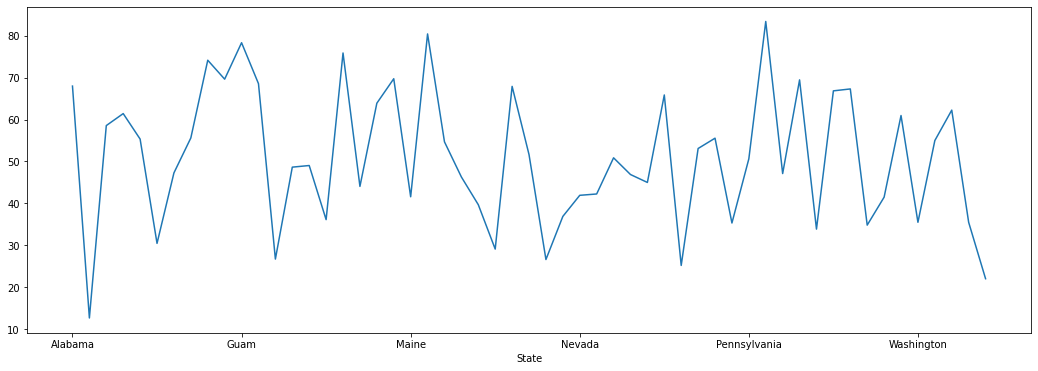

In [94]:
sdfUSA_grouped_Averages["TEMP"].plot()
plt.show()

On DataFrame, `plot()` is a convenience to plot all of the columns with labels:

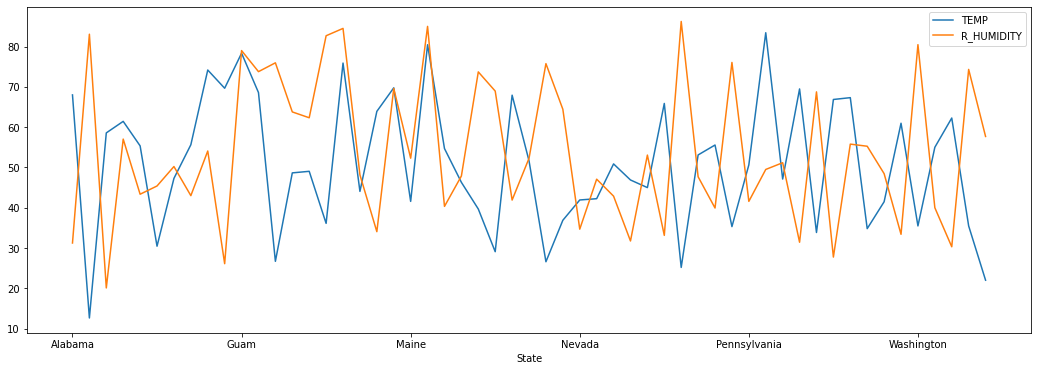

In [95]:
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].plot()
plt.show()

You can plot one column versus another using the `x` and `y` keywords in `plot()`:

### Other Plots

[[back to top]](#Table-of-Contents)

Plotting methods allow for a handful of plot styles other than the default Line plot. These methods can be provided as the kind keyword argument to `plot()`. These include:

   - ‘bar’ or ‘barh’ for bar plots
   - ‘hist’ for histogram
   - ‘box’ for boxplot
   - ‘kde’ or 'density' for density plots
   - ‘area’ for area plots
   - ‘scatter’ for scatter plots
   - ‘hexbin’ for hexagonal bin plots
   - ‘pie’ for pie plots

In addition to these kind s, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface.

Finally, there are several plotting functions in `pandas.tools.plotting` that take a Series or DataFrame as an argument. These include

   - Scatter Matrix
   - Andrews Curves
   - Parallel Coordinates
   - Lag Plot
   - Autocorrelation Plot
   - Bootstrap Plot
   - RadViz

Plots may also be adorned with errorbars or tables.

### Bar plots

[[back to top]](#Table-of-Contents)

For labeled, non-time series data, you may wish to produce a bar plot:

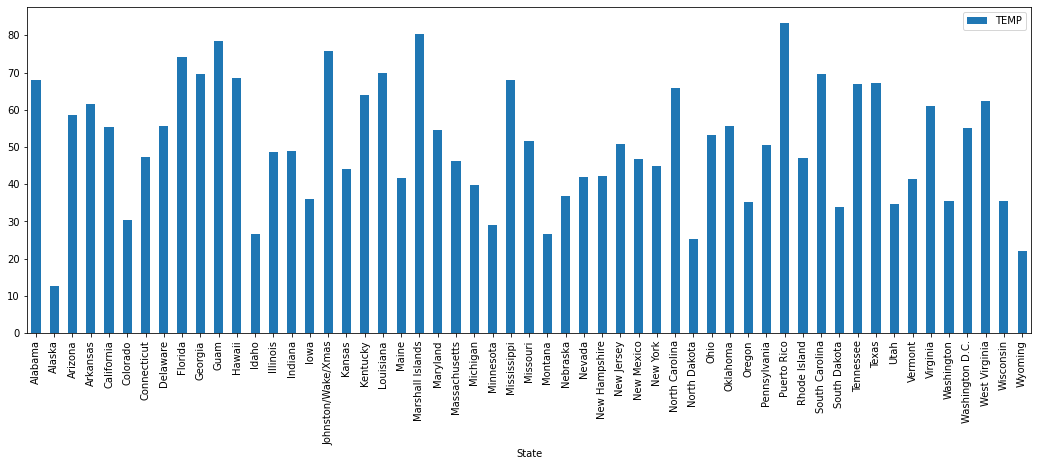

In [96]:
sdfUSA_grouped_Averages.plot(kind='bar',y='TEMP');
plt.show()

Calling a DataFrame’s `plot()` method with `kind='bar'` produces a multiple bar plot:

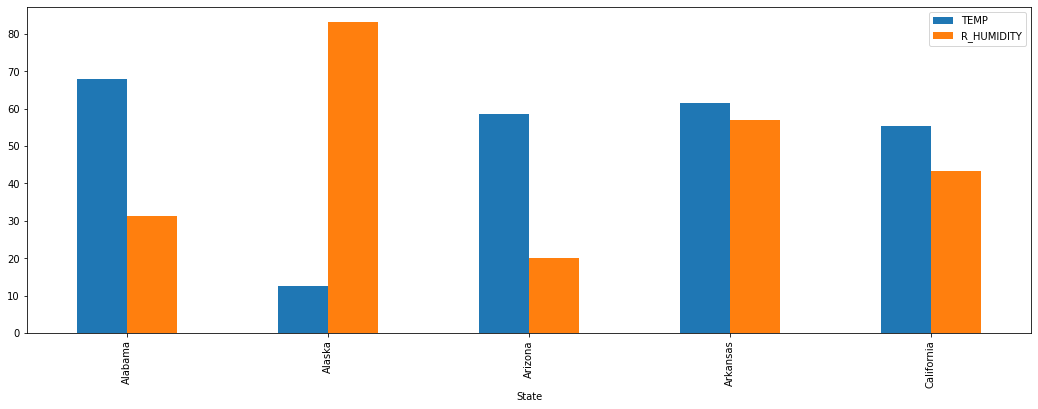

In [97]:
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].head().plot(kind='bar')
plt.show()

To produce a stacked bar plot, pass `stacked=True`:

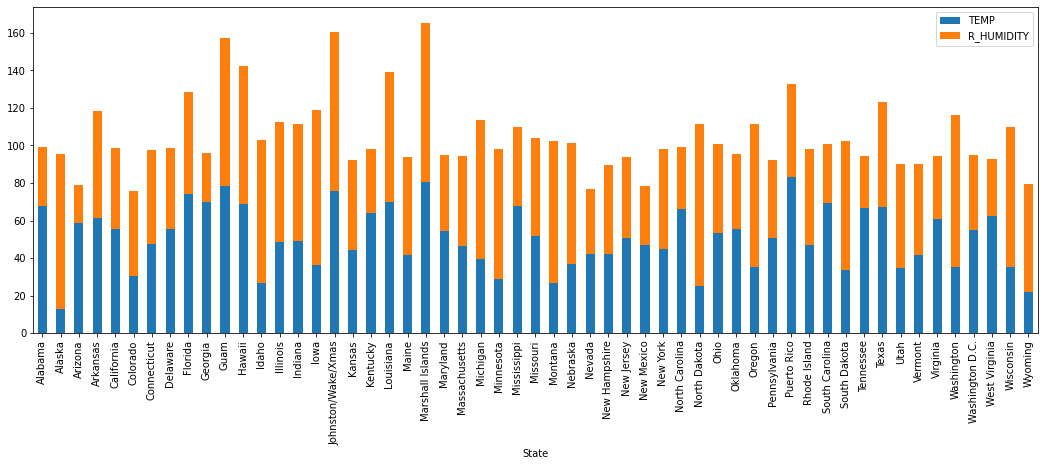

In [98]:
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].plot(kind='bar', stacked=True);
plt.show()

To get horizontal bar plots, pass `kind='barh'`:

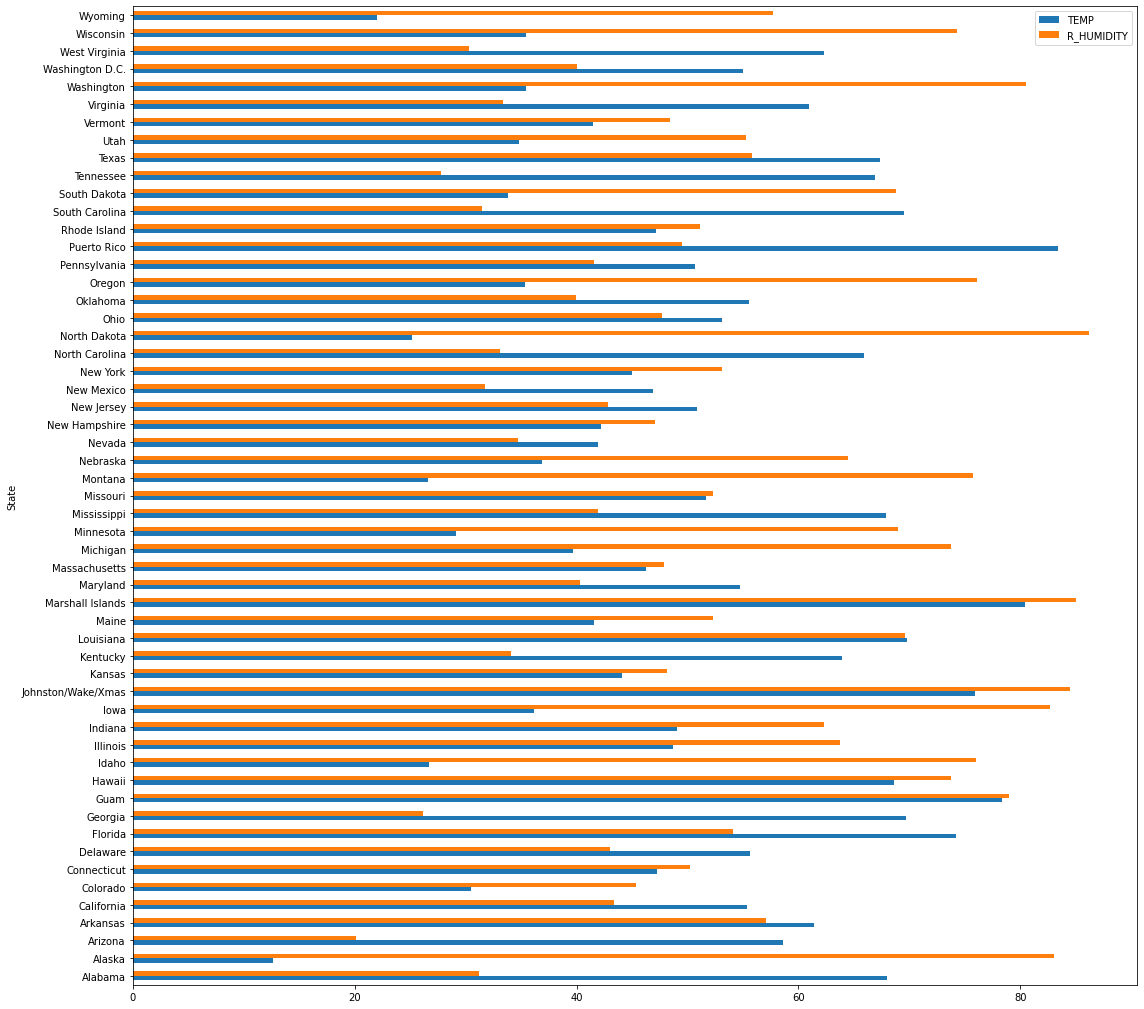

In [99]:
plt.rcParams["figure.figsize"] = (18.0, 18.0)
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].plot(kind='barh');
plt.show()

### Histograms

[[back to top]](#Table-of-Contents)

Histogram can be drawn specifying `kind='hist'`.

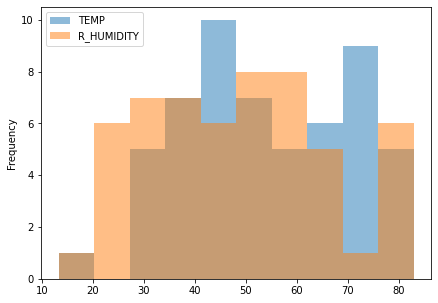

In [99]:
# Reduce plot's size
plt.rcParams["figure.figsize"] = (7.0, 5.0)

sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].plot(kind='hist', alpha=0.5)
plt.show()

Histogram can be stacked by `stacked=True`. Bin size can be changed by bins keyword.

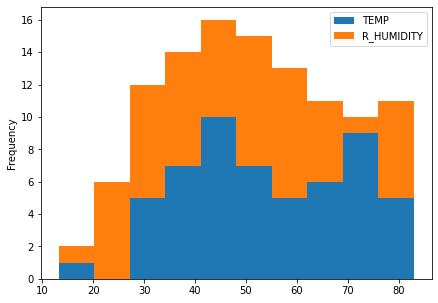

In [100]:
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].plot(kind='hist', stacked=True, bins=10)
plt.show()

You can pass other keywords supported by matplotlib hist. For example, horizontal and cumulative histgram can be drawn by `orientation='horizontal'` and `cumulative='True'`.

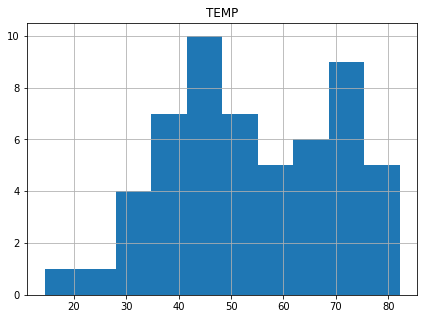

In [101]:
sdfUSA_grouped_Averages[["TEMP"]].hist()
plt.show()

`DataFrame.hist()` plots the histograms of the columns on multiple subplots:

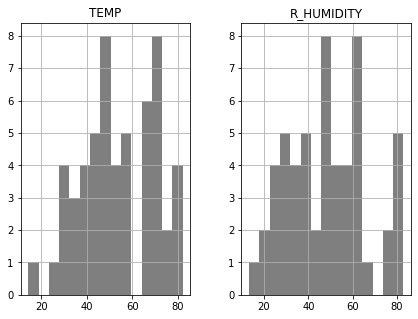

In [102]:
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].hist(color='k', alpha=0.5, bins=15)
plt.show()

### Box Plots

[[back to top]](#Table-of-Contents)

Boxplot can be drawn calling a `Series` and `DataFrame.plot` with `kind='box'`, or `DataFrame.boxplot` to visualize the distribution of values within each column.

`plot` method now supports `kind='box'` to draw boxplot.

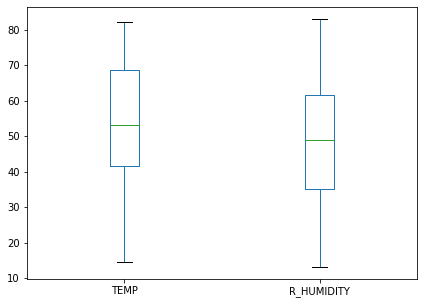

In [103]:
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].plot(kind='box')
plt.show()

Boxplot can be colorized by passing color keyword. You can pass a dict whose keys are boxes, whiskers, medians and caps. If some keys are missing in the dict, default colors are used for the corresponding artists. Also, boxplot has sym keyword to specify fliers style.

When you pass other type of arguments via `color` keyword, it will be directly passed to matplotlib for all the boxes, whiskers, medians and caps colorization.

The colors are applied to every boxes to be drawn. If you want more complicated colorization, you can get each drawn artists by passing `return_type`.

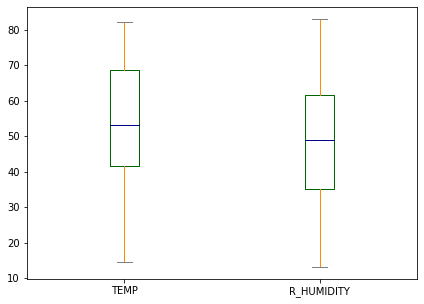

In [104]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].plot(kind='box', color=color, sym='r+')
plt.show()

Also, you can pass other keywords supported by matplotlib boxplot. For example, horizontal and custom-positioned boxplot can be drawn by `vert=False` and `positions` keywords.

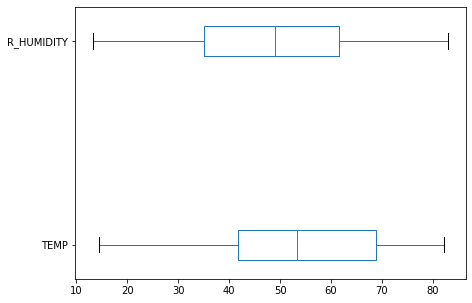

In [105]:
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].plot(kind='box', vert=False, positions=[1, 4])
plt.show()

### Area Plot

[[back to top]](#Table-of-Contents)

You can create area plots with `Series.plot` and `DataFrame.plot` by passing `kind='area'`. Area plots are stacked by default. To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains `NaN`, it will be automatically filled by `0`. If you want to `drop` or `fill` by different values, use `dataframe.dropna()` or `dataframe.fillna()` before calling plot.

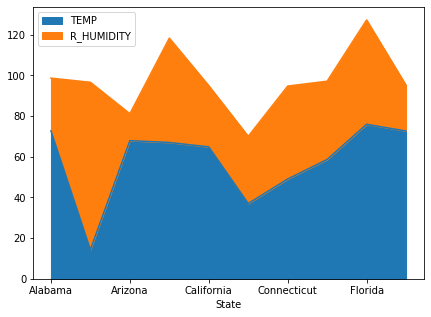

In [106]:
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].head(10).plot(kind='area');
plt.show()

To produce an unstacked plot, pass `stacked=False`. `Alpha` value is set to `0.5` unless otherwise specified:

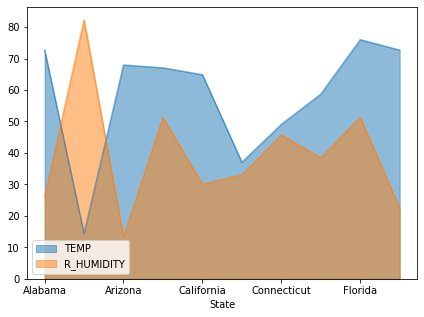

In [107]:
sdfUSA_grouped_Averages[["TEMP", "R_HUMIDITY"]].head(10).plot(kind='area', stacked=False)
plt.show()

### Scatter Plot

[[back to top]](#Table-of-Contents)

You can create scatter plots with `DataFrame.plot` by passing `kind='scatter'`. Scatter plot requires numeric columns for `x` and `y` axis. These can be specified by `x` and `y` keywords each.

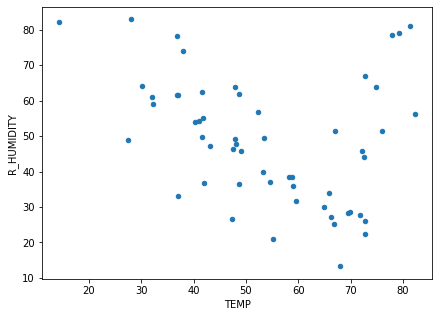

In [111]:
sdfUSA_grouped_Averages.plot(kind='scatter', x='TEMP', y='R_HUMIDITY');
plt.show()

The keyword `c` may be given as the name of a column to provide colors for each point:

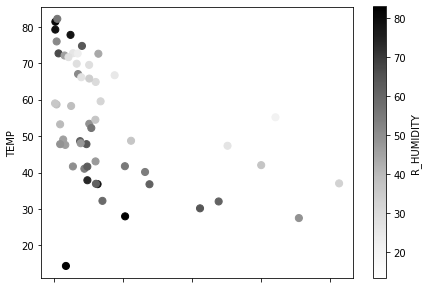

In [112]:
sdfUSA_grouped_Averages.plot(kind='scatter', x='ELEVATION', y='TEMP', c="R_HUMIDITY", s=50);
plt.show()

You can pass other keywords supported by `matplotlib scatter`. Below example shows a bubble chart using a dataframe column values as bubble size.

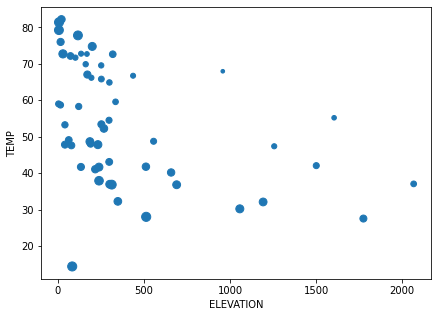

In [113]:
sdfUSA_grouped_Averages.plot(kind='scatter', x='ELEVATION', y='TEMP', s="R_HUMIDITY");
plt.show()

### Hexagonal Bin Plot

[[back to top]](#Table-of-Contents)

You can create hexagonal bin plots with `DataFrame.plot()` and `kind='hexbin'`. Hexbin plots can be a useful alternative to scatter plots if your data are too dense to plot each point individually.

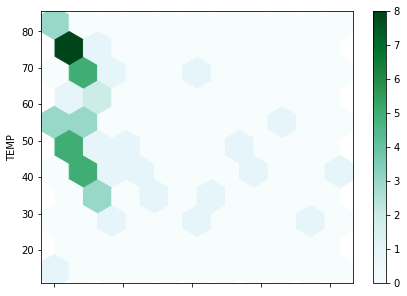

In [114]:
sdfUSA_grouped_Averages.plot(kind='hexbin', x='ELEVATION', y='TEMP', gridsize=10);
plt.show()

### Pie plot

[[back to top]](#Table-of-Contents)

You can create a pie plot with `DataFrame.plot()` or `Series.plot()` with `kind='pie'`. If your data includes any `NaN`, they will be automatically filled with 0. A `ValueError` will be raised if there are any negative values in your data.